In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("/kaggle/input/thapar-summer-school-basic-classification/Train_dataset.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,patient_id
0,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0,179
1,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0,228
2,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1,111
3,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0,246
4,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1,60


In [3]:
df.dtypes

age             int64
sex             int64
cp              int64
trtbps          int64
chol            int64
fbs             int64
restecg         int64
thalachh        int64
exng            int64
oldpeak       float64
slp             int64
caa             int64
thall           int64
output          int64
patient_id      int64
dtype: object

In [4]:
print(df.isnull().sum())

age           0
sex           0
cp            0
trtbps        0
chol          0
fbs           0
restecg       0
thalachh      0
exng          0
oldpeak       0
slp           0
caa           0
thall         0
output        0
patient_id    0
dtype: int64


<Axes: xlabel='output'>

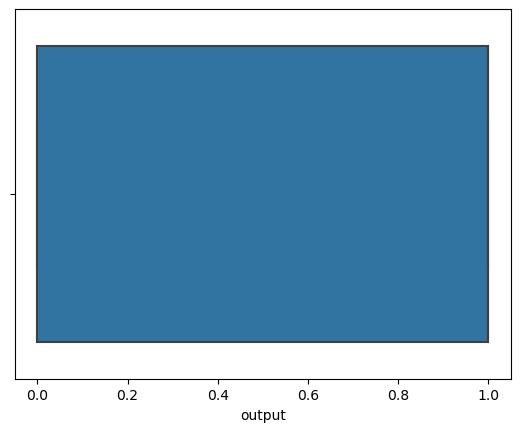

In [5]:
sns.boxplot(x=df['output'])

In [6]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 14.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ | done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 4.2 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - \ | / done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 56.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 60.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 50.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.2/185.2

In [7]:
from pycaret.utils import version
version()

'3.0.4'

In [8]:
myDataSet = pd.read_csv('/kaggle/input/thapar-summer-school-basic-classification/Train_dataset.csv')
myDataSet.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,patient_id
0,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0,179
1,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0,228
2,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1,111
3,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0,246
4,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1,60


In [9]:
from pycaret.classification import *

setup(data = myDataSet, target='output')
cm = compare_models()

,Description,Value
0,Session id,6647
1,Target,output
2,Target type,Binary
3,Original data shape,"(242, 15)"
4,Transformed data shape,"(242, 15)"
5,Transformed train set shape,"(169, 15)"
6,Transformed test set shape,"(73, 15)"
7,Numeric features,14
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.5810
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.3200
catboost,CatBoost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.5930
dt,Decision Tree Classifier,0.9941,0.9938,1.0000,0.9900,0.9947,0.9881,0.9887,0.0400
ada,Ada Boost Classifier,0.9941,0.9938,1.0000,0.9900,0.9947,0.9881,0.9887,0.0420
gbc,Gradient Boosting Classifier,0.9941,0.9938,1.0000,0.9900,0.9947,0.9881,0.9887,0.1570
lightgbm,Light Gradient Boosting Machine,0.9941,1.0000,1.0000,0.9900,0.9947,0.9881,0.9887,0.2710
xgboost,Extreme Gradient Boosting,0.9882,0.9882,0.9889,0.9900,0.9889,0.9764,0.9776,0.0600
knn,K Neighbors Classifier,0.9765,0.9993,0.9778,0.9800,0.9777,0.9528,0.9553,0.0460
ridge,Ridge Classifier,0.9765,0.0000,0.9678,0.9900,0.9777,0.9528,0.9553,0.0310


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [10]:
setup(data=myDataSet, target='output',
      feature_selection = True, feature_selection_method = 'classic')
cm = compare_models()

,Description,Value
0,Session id,7032
1,Target,output
2,Target type,Binary
3,Original data shape,"(242, 15)"
4,Transformed data shape,"(242, 3)"
5,Transformed train set shape,"(169, 3)"
6,Transformed test set shape,"(73, 3)"
7,Numeric features,14
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9588,0.9686,0.9800,0.9568,0.9675,0.9120,0.9142,0.2530
rf,Random Forest Classifier,0.9529,0.9500,0.9700,0.9550,0.9618,0.9007,0.9023,0.7620
ridge,Ridge Classifier,0.9471,0.0000,0.9689,0.9500,0.9578,0.8868,0.8907,0.1480
lda,Linear Discriminant Analysis,0.9471,0.9700,0.9689,0.9500,0.9578,0.8868,0.8907,0.1650
lightgbm,Light Gradient Boosting Machine,0.9471,0.9629,0.9600,0.9528,0.9555,0.8898,0.8918,0.2330
catboost,CatBoost Classifier,0.9471,0.9686,0.9600,0.9528,0.9555,0.8898,0.8918,0.9770
knn,K Neighbors Classifier,0.9412,0.9393,0.9500,0.9500,0.9500,0.8786,0.8786,0.1920
nb,Naive Bayes,0.9353,0.9743,0.9800,0.9218,0.9484,0.8627,0.8689,0.1830
dt,Decision Tree Classifier,0.9353,0.9250,0.9400,0.9478,0.9437,0.8677,0.8680,0.1880
ada,Ada Boost Classifier,0.9353,0.9600,0.9600,0.9392,0.9483,0.8623,0.8653,0.2250


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [11]:
setup(data=myDataSet, target='output',
      feature_selection = True, feature_selection_method = 'univariate')
cm = compare_models()

,Description,Value
0,Session id,6766
1,Target,output
2,Target type,Binary
3,Original data shape,"(242, 15)"
4,Transformed data shape,"(242, 3)"
5,Transformed train set shape,"(169, 3)"
6,Transformed test set shape,"(73, 3)"
7,Numeric features,14
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9941,1.0000,1.0000,0.9900,0.9947,0.9881,0.9887,0.1310
dt,Decision Tree Classifier,0.9941,0.9938,1.0000,0.9900,0.9947,0.9881,0.9887,0.1180
rf,Random Forest Classifier,0.9941,1.0000,1.0000,0.9909,0.9952,0.9876,0.9883,0.7050
ada,Ada Boost Classifier,0.9941,0.9938,1.0000,0.9900,0.9947,0.9881,0.9887,0.1220
gbc,Gradient Boosting Classifier,0.9941,0.9938,1.0000,0.9900,0.9947,0.9881,0.9887,0.3260
et,Extra Trees Classifier,0.9941,1.0000,1.0000,0.9909,0.9952,0.9876,0.9883,0.6520
catboost,CatBoost Classifier,0.9941,1.0000,1.0000,0.9900,0.9947,0.9881,0.9887,0.6860
knn,K Neighbors Classifier,0.9882,1.0000,1.0000,0.9809,0.9900,0.9757,0.9770,0.1200
xgboost,Extreme Gradient Boosting,0.9882,0.9882,0.9889,0.9900,0.9889,0.9764,0.9776,0.1490
lightgbm,Light Gradient Boosting Machine,0.9882,0.9938,1.0000,0.9809,0.9900,0.9757,0.9770,0.1860


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [12]:
setup(data=myDataSet, target='output')

lrModel = create_model('lr')

,Description,Value
0,Session id,1809
1,Target,output
2,Target type,Binary
3,Original data shape,"(242, 15)"
4,Transformed data shape,"(242, 15)"
5,Transformed train set shape,"(169, 15)"
6,Transformed test set shape,"(73, 15)"
7,Numeric features,14
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [13]:
lrModel

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1809, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
new_data=pd.read_csv("/kaggle/input/thapar-summer-school-basic-classification/test_dataset.csv")

In [15]:
predictions=predict_model(lrModel,data=new_data)
predictions

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,patient_id,prediction_label,prediction_score
0,45,0,1,112,160,0,1,138,0,0.0,1,0,2,94,1,1.0
1,55,0,0,180,327,0,2,117,1,3.4,1,0,2,266,0,1.0
2,35,1,0,120,198,0,1,130,1,1.6,1,0,3,227,0,1.0
3,59,1,3,134,204,0,1,162,0,0.8,2,2,2,286,0,1.0
4,60,1,0,125,258,0,0,141,1,2.8,1,1,3,201,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,50,1,2,140,233,0,1,163,0,0.6,1,1,3,188,0,1.0
57,51,1,2,94,227,0,1,154,1,0.0,2,1,3,71,1,1.0
58,69,1,3,160,234,1,0,131,0,0.1,1,1,2,106,1,1.0
59,46,1,0,120,249,0,0,144,0,0.8,2,0,3,270,0,1.0


In [16]:
predictions.to_csv("predictions.csv",index=False)